In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf, Hist

import thinkplot

In [2]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

In [3]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


In [4]:
gss.hapmar

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
62436    2
62437    2
62438    1
62439    1
62440    0
62441    1
62442    0
62443    0
62444    1
62445    0
62446    1
62447    0
62448    1
62449    1
62450    1
62451    1
62452    1
62453    1
62454    0
62455    0
62456    2
62457    1
62458    0
62459    2
62460    0
62461    1
62462    0
62463    2
62464    2
62465    2
Name: hapmar, Length: 62466, dtype: int64

In [5]:
def replace_invalid(df):
    df.hapmar.replace([0, 9, 8], np.nan, inplace=True)                  

replace_invalid(gss)

In [6]:
gss['hapmar'].describe()

count    29566.000000
mean         1.397720
std          0.547497
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: hapmar, dtype: float64

1972


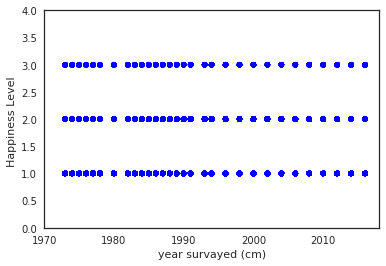

In [7]:
hap = gss.hapmar
year_sur = gss.year
print(year_sur[9])

thinkplot.Scatter(year_sur, hap, alpha=1)
thinkplot.Config(xlabel='year survayed (cm)',
                 ylabel='Happiness Level ',
                 axis=[1970, 2018, 0, 4],
                 legend=False)

In [8]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

hap = Jitter(hap, 0.5)
year_sur = Jitter(year_sur, 0.8)

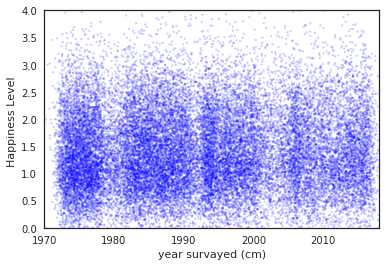

In [9]:
thinkplot.Scatter(year_sur, hap, alpha=.2, s=5)
thinkplot.Config(xlabel='year survayed (cm)',
                 ylabel='Happiness Level ',
                 axis=[1970, 2018, 0, 4],
                 legend=False)

0.03010214435500237

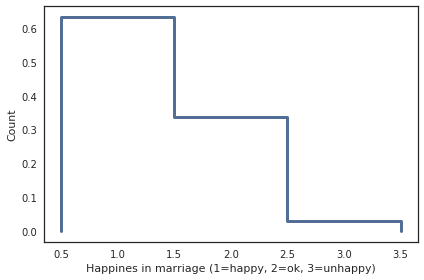

In [14]:
hist_hapmar = Pmf(gss.hapmar)
thinkplot.pmf(hist_hapmar)
decorate(xlabel='Happines in marriage (1=happy, 2=ok, 3=unhappy)', 
         ylabel='Count')

hist_hapmar[3]

So it appears that in general, people are not actively unhappy in their marriages, or they are unwilling to report unhappiness. 

Accordingly, for a binary first pass, I am going to start by looking at reportedly happy marriages by percent over the years. 

Hist({1599: 1, 1372: 1, 1860: 1, 1606: 1, 1481: 1, 1537: 1, 1484: 1, 1613: 1, 2832: 1, 1490: 1, 1468: 1, 2538: 1, 2904: 1, 2044: 1, 1819: 1, 4510: 1, 1470: 1, 1504: 1, 1499: 1, 2023: 1, 2817: 1, 1534: 1, 1517: 1, 2765: 1, 2992: 1, 2867: 1, 1974: 1, 1530: 1, 2812: 1, 1532: 1, 1473: 1})